# What the Health?!

#### This project aims to examine the relationship between a patient's total medical bill and the different factors a hospital may consider. 

This project will focus on exhausting the method of __Polynomial Regression__ to model relationships between different features of the dataset.

Kaggle Link to dataset: https://www.kaggle.com/datasets/prasad22/healthcare-dataset

Variables of the dataset:
- Name
- Age
- Gender
- Blood Type
- Medical Condition
- Date of Admission
- Doctor
- Hospital
- Insurance Provider
- Billing Amount
- Room Number
- Admission Type
- Discharge Date
- Medication
- Test Results


We will first import the correct libraries, with the option to install if needed...

In [3]:
# pip install pandas numpy seaborn matplotlib scikit-learn
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

### Now we will import our dataset and look at the first 5 rows!

In [5]:
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


### The dataset has some random lettering, so let's fix that by making everything uppercase...

In [7]:
df = df.map(lambda x: x.upper() if type(x) == str else x)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,BOBBY JACKSON,30,MALE,B-,CANCER,2024-01-31,MATTHEW SMITH,SONS AND MILLER,BLUE CROSS,18856.281306,328,URGENT,2024-02-02,PARACETAMOL,NORMAL
1,LESLIE TERRY,62,MALE,A+,OBESITY,2019-08-20,SAMANTHA DAVIES,KIM INC,MEDICARE,33643.327287,265,EMERGENCY,2019-08-26,IBUPROFEN,INCONCLUSIVE
2,DANNY SMITH,76,FEMALE,A-,OBESITY,2022-09-22,TIFFANY MITCHELL,COOK PLC,AETNA,27955.096079,205,EMERGENCY,2022-10-07,ASPIRIN,NORMAL
3,ANDREW WATTS,28,FEMALE,O+,DIABETES,2020-11-18,KEVIN WELLS,"HERNANDEZ ROGERS AND VANG,",MEDICARE,37909.782410,450,ELECTIVE,2020-12-18,IBUPROFEN,ABNORMAL
4,ADRIENNE BELL,43,FEMALE,AB+,CANCER,2022-09-19,KATHLEEN HANNA,WHITE-WHITE,AETNA,14238.317814,458,URGENT,2022-10-09,PENICILLIN,ABNORMAL


### Now let's take a look at some aspects of the dataset!

In [9]:
df.shape

(55500, 15)

In [10]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [11]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [12]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

### Let's see what values we have for all columns except _Name_, _Hospital_, _Doctor_, _Date of Admission_, and _Discharge Date_...

We will be encoding the values in those other columns later.

In [14]:
set(df['Blood Type'].to_list())

{'A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-'}

In [15]:
set(df['Medical Condition'].to_list())

{'ARTHRITIS', 'ASTHMA', 'CANCER', 'DIABETES', 'HYPERTENSION', 'OBESITY'}

In [16]:
set(df['Insurance Provider'].to_list())

{'AETNA', 'BLUE CROSS', 'CIGNA', 'MEDICARE', 'UNITEDHEALTHCARE'}

In [17]:
set(df['Admission Type'].to_list())

{'ELECTIVE', 'EMERGENCY', 'URGENT'}

In [18]:
set(df['Medication'].to_list())

{'ASPIRIN', 'IBUPROFEN', 'LIPITOR', 'PARACETAMOL', 'PENICILLIN'}

In [19]:
set(df['Test Results'].to_list())

{'ABNORMAL', 'INCONCLUSIVE', 'NORMAL'}

In [20]:
set(df['Gender'].to_list())

{'FEMALE', 'MALE'}

In [21]:
# set(df['Hospital'].to_list())

In [22]:
# set(df['Name'].to_list())

### We will go ahead and replace the columns we just examined with integer values...

In [118]:
df['Blood Type'] = df['Blood Type'].replace(['A+','A-','AB+','AB-','B+','B-','O+','O-'],[0,1,2,3,4,5,6,7])
df['Medical Condition'] = df['Medical Condition'].replace(['ARTHRITIS','ASTHMA','CANCER','DIABETES','HYPERTENSION','OBESITY'],[0,1,2,3,4,5])
df['Insurance Provider'] = df['Insurance Provider'].replace(['AETNA','BLUE CROSS','CIGNA','MEDICARE','UNITEDHEALTHCARE'],[0,1,2,3,4])
df['Admission Type'] = df['Admission Type'].replace(['ELECTIVE','EMERGENCY','URGENT'],[0,1,2])
df['Medication'] = df['Medication'].replace(['ASPIRIN','IBUPROFEN','LIPITOR','PARACETAMOL','PENICILLIN'],[0,1,2,3,4])
df['Test Results'] = df['Test Results'].replace(['ABNORMAL','INCONCLUSIVE','NORMAL'],[0,1,2])
df['Gender'] = df['Gender'].replace(['MALE','FEMALE'],[0,1])

df.infer_objects(copy=False) # to prevent the deprecation warning and to keep the old behavior

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Name_Encoded,Date of Admission Encoded,Doctor_Encoded,Hospital_Encoded,Discharge Date Encoded
0,BOBBY JACKSON,30,0,5,2,2024-01-31,MATTHEW SMITH,SONS AND MILLER,1,18856.281306,328,2,2024-02-02,3,2,4223,1729,26612,34469,1730
1,LESLIE TERRY,62,0,0,5,2019-08-20,SAMANTHA DAVIES,KIM INC,3,33643.327287,265,1,2019-08-26,1,1,23973,104,33648,20829,109
2,DANNY SMITH,76,1,1,5,2022-09-22,TIFFANY MITCHELL,COOK PLC,0,27955.096079,205,1,2022-10-07,0,2,9537,1233,37828,10300,1247
3,ANDREW WATTS,28,1,6,3,2020-11-18,KEVIN WELLS,"HERNANDEZ ROGERS AND VANG,",3,37909.782410,450,0,2020-12-18,1,0,2219,560,22511,17147,589
4,ADRIENNE BELL,43,1,2,2,2022-09-19,KATHLEEN HANNA,WHITE-WHITE,0,14238.317814,458,2,2022-10-09,4,0,352,1230,21259,38411,1249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,ELIZABETH JACKSON,42,1,6,1,2020-08-16,JOSHUA JARVIS,JONES-THOMPSON,1,2650.714952,417,0,2020-09-15,4,0,12315,466,20003,20366,495
55496,KYLE PEREZ,61,1,3,5,2020-01-23,TAYLOR SULLIVAN,TUCKER-MOYER,2,31457.797307,316,0,2020-02-01,0,2,23213,260,37149,36535,268
55497,HEATHER WANG,38,1,4,4,2020-07-13,JOE JACOBS DVM,"AND MAHONEY JOHNSON VASQUEZ,",4,27620.764717,347,2,2020-08-10,1,0,14689,432,18550,2883,459
55498,JENNIFER JONES,43,0,7,0,2019-05-25,KIMBERLY CURRY,"JACKSON TODD AND CASTRO,",3,32451.092358,321,0,2019-05-31,1,0,17144,17,22665,19154,22


### Let's take a look at the _Name, Doctor,_ and _Hospital_ columns to see how many unique values there are...

In [26]:
patients = len(pd.unique(df['Name']))
docs = len(pd.unique(df['Doctor']))
hospitals = len(pd.unique(df['Hospital']))

print("Unique Patient Names: ", patients)
print("Unique Doctor Names: ", docs)
print("Unique Hospital Names: ", hospitals)       

Unique Patient Names:  40235
Unique Doctor Names:  40341
Unique Hospital Names:  39876


### Interesting, we will consider patients with the same name to be the same person.
#### Now let's take a look at the data types now that we've done some work on them...

In [28]:
df.dtypes

Name                   object
Age                     int64
Gender                  int64
Blood Type              int64
Medical Condition       int64
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider      int64
Billing Amount        float64
Room Number             int64
Admission Type          int64
Discharge Date         object
Medication              int64
Test Results            int64
dtype: object

### Let's try to encode all object values to a unique integer value, we want to see if there will be any correlations to any other features in our regression models...

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Name_Encoded'] = label_encoder.fit_transform(df['Name'])
df['Date of Admission Encoded'] = label_encoder.fit_transform(df['Date of Admission'])
df['Doctor_Encoded'] = label_encoder.fit_transform(df['Doctor'])
df['Hospital_Encoded'] = label_encoder.fit_transform(df['Hospital'])
df['Discharge Date Encoded'] = label_encoder.fit_transform(df['Discharge Date'])

name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
admission_date_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
doctor_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
hospital_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
discharge_date_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Name_Encoded,Date of Admission Encoded,Doctor_Encoded,Hospital_Encoded,Discharge Date Encoded
0,BOBBY JACKSON,30,0,5,2,2024-01-31,MATTHEW SMITH,SONS AND MILLER,1,18856.281306,328,2,2024-02-02,3,2,4223,1729,26612,34469,1730
1,LESLIE TERRY,62,0,0,5,2019-08-20,SAMANTHA DAVIES,KIM INC,3,33643.327287,265,1,2019-08-26,1,1,23973,104,33648,20829,109
2,DANNY SMITH,76,1,1,5,2022-09-22,TIFFANY MITCHELL,COOK PLC,0,27955.096079,205,1,2022-10-07,0,2,9537,1233,37828,10300,1247
3,ANDREW WATTS,28,1,6,3,2020-11-18,KEVIN WELLS,"HERNANDEZ ROGERS AND VANG,",3,37909.782410,450,0,2020-12-18,1,0,2219,560,22511,17147,589
4,ADRIENNE BELL,43,1,2,2,2022-09-19,KATHLEEN HANNA,WHITE-WHITE,0,14238.317814,458,2,2022-10-09,4,0,352,1230,21259,38411,1249


### Let's see how the new dataframe looks now!

In [32]:
new_df = df.drop(columns=['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Discharge Date'])
new_df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Name_Encoded,Date of Admission Encoded,Doctor_Encoded,Hospital_Encoded,Discharge Date Encoded
0,30,0,5,2,1,18856.281306,328,2,3,2,4223,1729,26612,34469,1730
1,62,0,0,5,3,33643.327287,265,1,1,1,23973,104,33648,20829,109
2,76,1,1,5,0,27955.096079,205,1,0,2,9537,1233,37828,10300,1247
3,28,1,6,3,3,37909.782410,450,0,1,0,2219,560,22511,17147,589
4,43,1,2,2,0,14238.317814,458,2,4,0,352,1230,21259,38411,1249


### We want to isolate the _Billing Amount_ variable, as we want to see how other features are impacting it!

In [34]:
X = new_df.drop('Billing Amount', axis = 1)
Y = new_df['Billing Amount']

### Let's visualize our dataset!


__We will use a correlation matrix as this will give us a good idea of correlation within our dataset!__

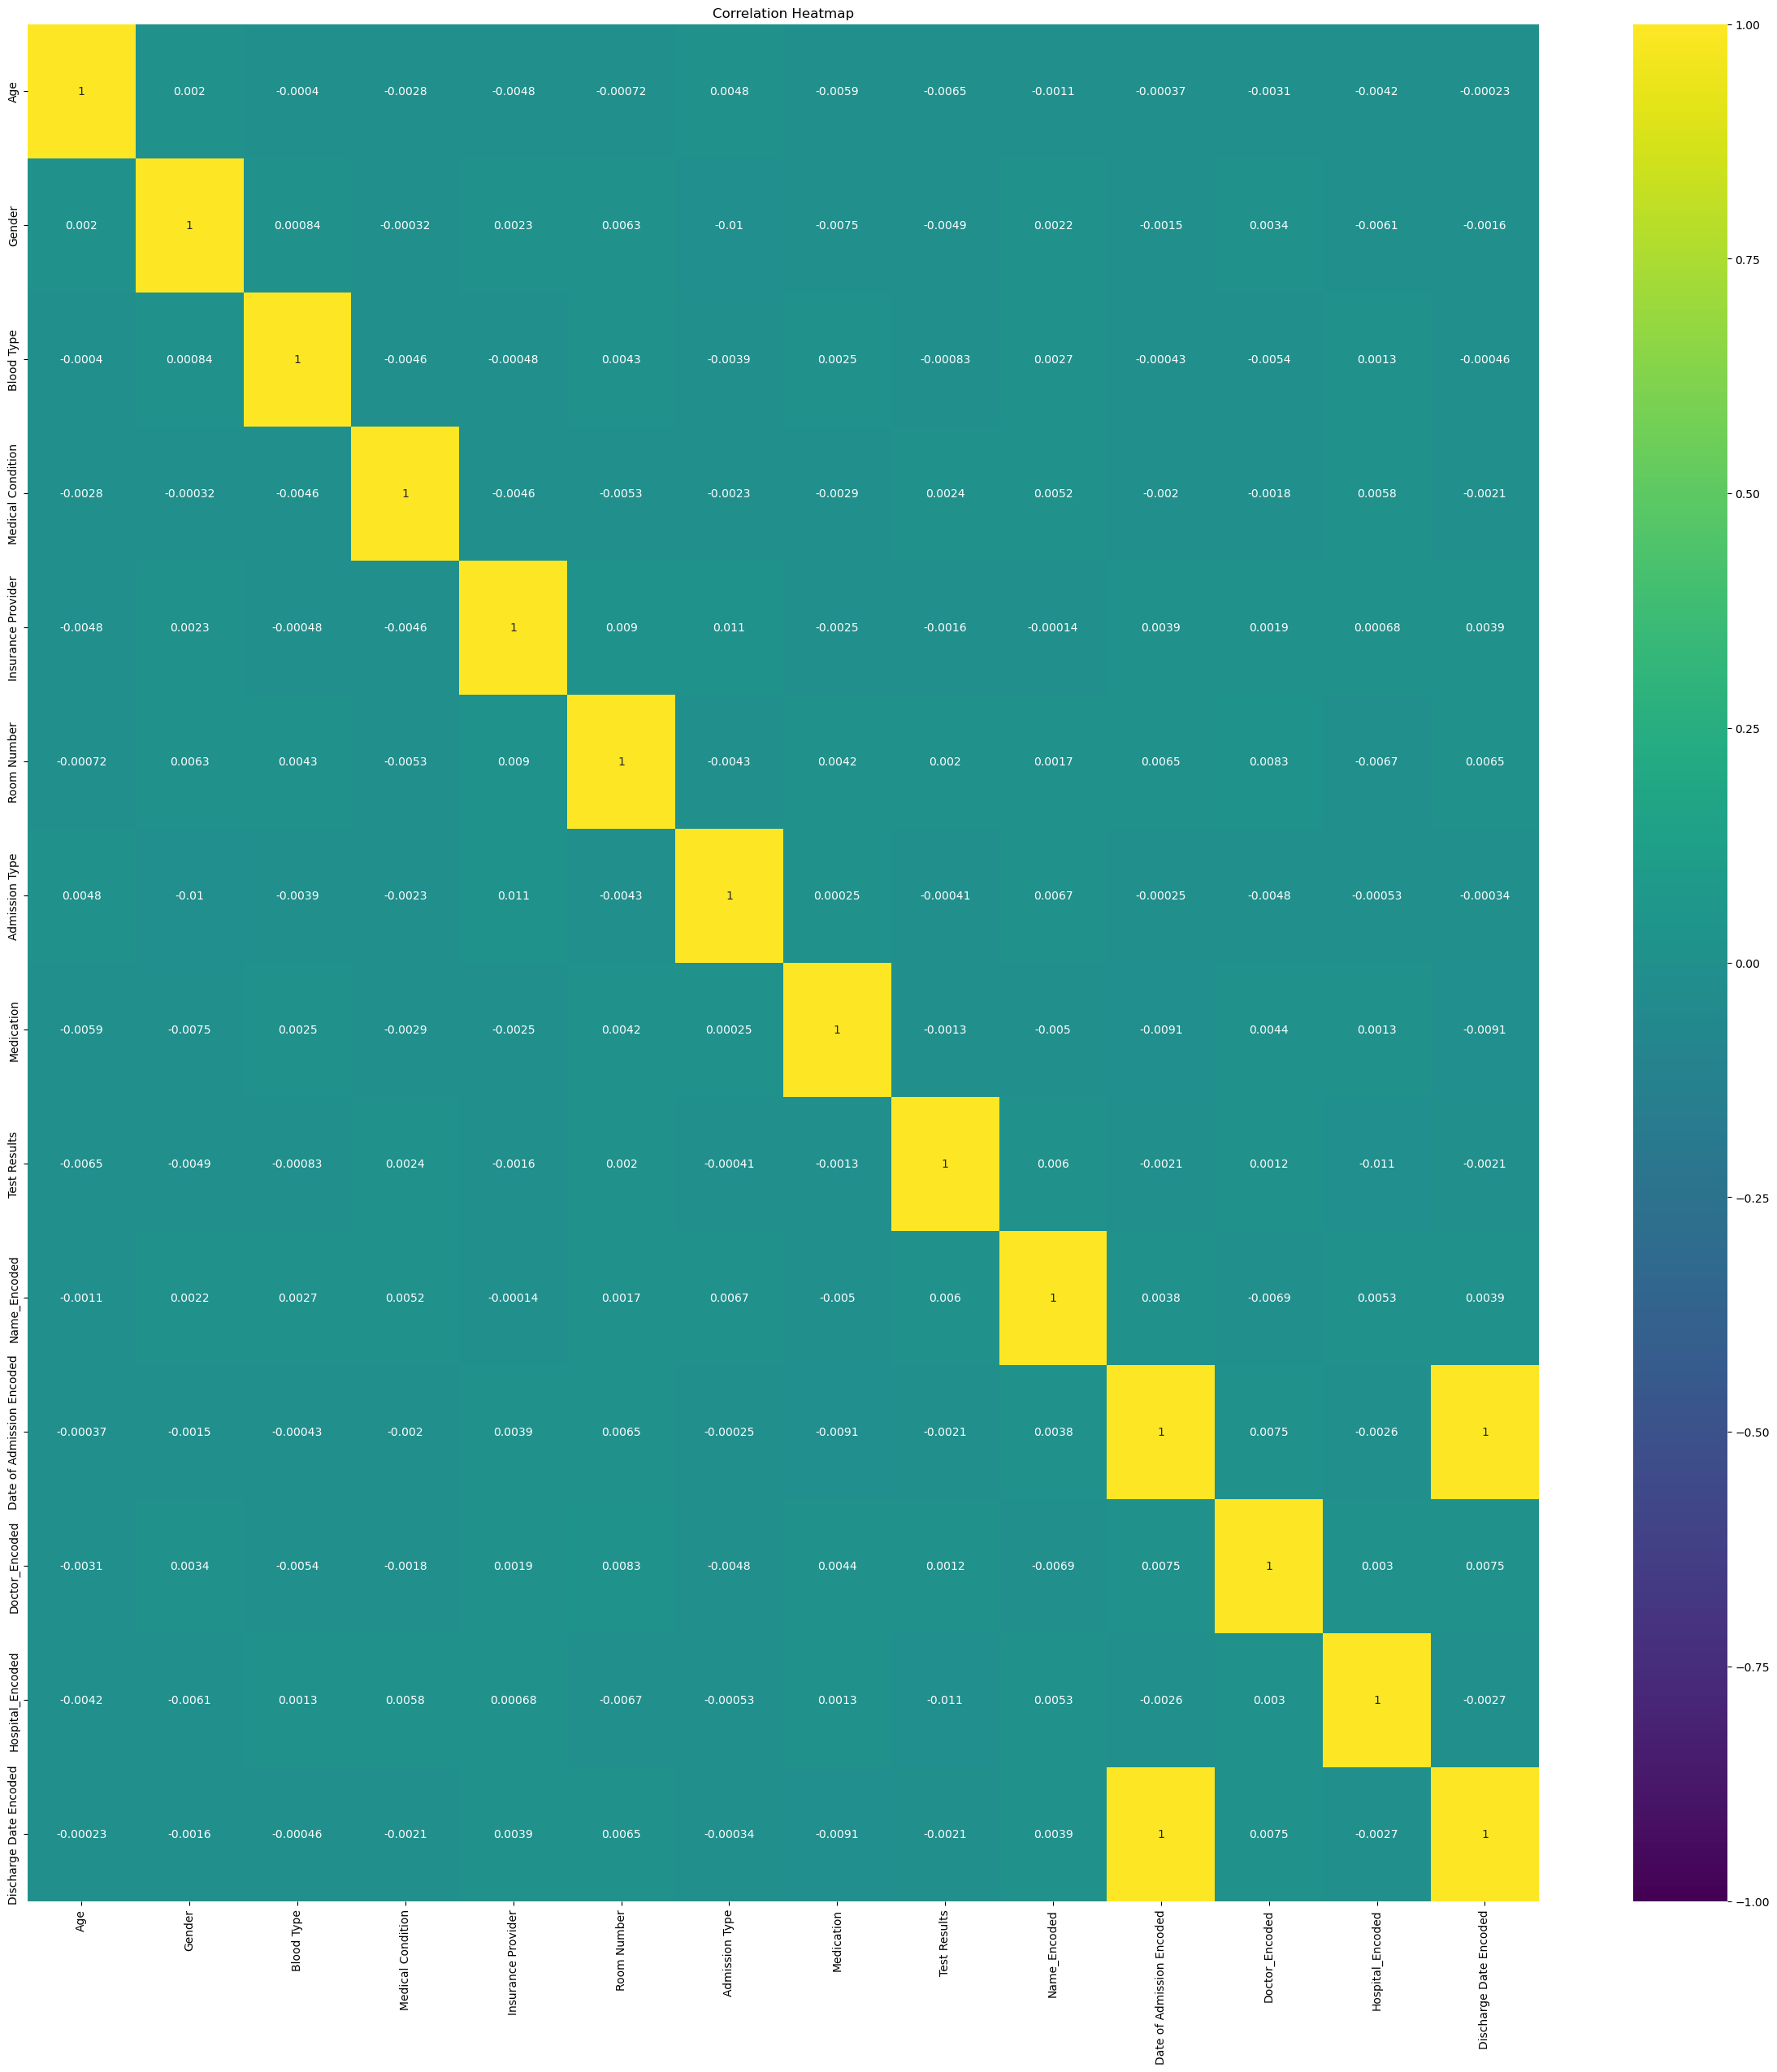

In [37]:
# Correlation Matrix

corr_matrix = X.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

It appears that there is low collinearity among the variables!

__Let's take a look at what a list of this correlation matrix looks like!__

In [40]:
print(new_df.corr()['Billing Amount'])


Age                         -0.003832
Gender                      -0.004827
Blood Type                  -0.001152
Medical Condition            0.005512
Insurance Provider          -0.003242
Billing Amount               1.000000
Room Number                 -0.002943
Admission Type              -0.002448
Medication                  -0.004072
Test Results                -0.002345
Name_Encoded                 0.001581
Date of Admission Encoded   -0.001057
Doctor_Encoded               0.003066
Hospital_Encoded             0.004380
Discharge Date Encoded      -0.001149
Name: Billing Amount, dtype: float64


__We will use a bar graph to see a visual representation of this correlation.__

We will make a dictionary of the list, and then use that dictionary to code a graph with the x-axis holding the value of 0.

In [42]:
# dictionary of correlation values
data = {
    "Age": -0.003832,
    "Gender": -0.004827,
    "Blood Type": -0.001152,
    "Medical Condition": 0.005512,
    "Insurance Provider": -0.003242,
    "Room Number": -0.002943,
    "Admission Type": -0.002448,
    "Medication": -0.004072,
    "Test Results": -0.002345,
    "Name_Encoded": 0.001581,
    "Date of Admission Encoded": -0.001057,
    "Doctor_Encoded": 0.003066,
    "Hospital_Encoded": 0.004380,
    "Discharge Date Encoded": -0.001149
}

In [43]:
# organizing of the values and separation of keys and values for extraction

correlate_data = dict(sorted(data.items(), key=lambda item: item[1]))
keys = list(correlate_data.keys())
values = list(correlate_data.values())

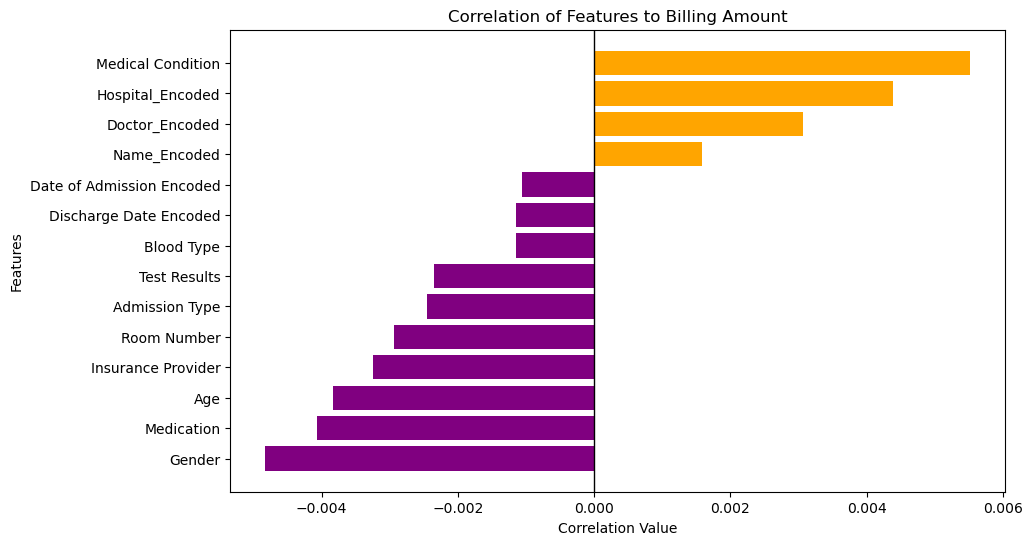

In [44]:
#creating graph
plt.figure(figsize=(10, 6))
plt.barh(keys, values, color=['purple' if v < 0 else 'orange' for v in values])

plt.axvline(x=0, color='black', linewidth=1)

plt.xlabel("Correlation Value")
plt.ylabel("Features")
plt.title("Correlation of Features to Billing Amount")

plt.show()

### Polynomial Regression Explained...

As mentioned in the beginning of this project, we will be exploring how/if polynomial regression is an ideal regression model for this dataset.

Polynomial regression is a type of linear regression, only it focuses on maintaining a curvature to align with a polynomial expression derived from the dataset. The polynomial expression is a descriptor of the relationship between the independent variable x and the dependent variable y.

The general equation is: $$ y = β_0 + β_1 ​x+β_2​x^2+…+β_n​x^n +ϵ $$

### Experiment 1: Polynomial Regression

We'll first try out polynomial regression, as there may not be a linear relationship between the data points. So, we'll attempt to use the curvature of the polynomial to model the relationship.

In [46]:
X = new_df.drop('Billing Amount', axis = 1)
Y = new_df['Billing Amount']

In [47]:
pf = PolynomialFeatures(degree=2)
X_poly_regr = pf.fit_transform(X)
X_poly_regr_train, X_poly_regr_test, Y_train, Y_test = train_test_split(X_poly_regr,Y, test_size = 0.2, random_state =50)

In [48]:
poly_regr = LinearRegression()
poly_regr.fit(X_poly_regr_train, Y_train)

LinearRegression()

In [49]:
poly_regr_predict = poly_regr.predict(X_poly_regr_test)

In [50]:
poly_mean_se = mean_squared_error(Y_test, poly_regr_predict).round(2)
poly_root_mean_se = np.sqrt(poly_mean_se).round(2)
poly_r2 = r2_score(Y_test, poly_regr_predict)

print("Mean Squared Error: ", poly_mean_se)
print("Root Mean Squared Error: ", poly_root_mean_se)
print("R2 Score: ", poly_r2)

Mean Squared Error:  201628422.86
Root Mean Squared Error:  14199.59
R2 Score:  -0.0029018113697540926


The Root Mean Squared Error for the entire dataset is $14,199.59, which is quite a lot when considering our goal was to see the error for the billing amount of hospital bills. It is possible that we might encounter some differences when narrowing down which columns we look at. As this is an exploration of polynomial regression, we will exhaust different sections of our data using this model.

### Experiment 2: Polynomial Regression with Feature Changes

In this second experiment, we will continue with polynomial regression with changes made to the features used in the experiment. This time we will only consider features of negative correlation:
- Age
- Gender
- Admission Type
- Medication
- Test Results
- Date of Admission Encoded
- Discharge Date Encoded
- Blood Type
- Insurance Provider

In [53]:
X2 = new_df.drop(columns=['Billing Amount', 'Medical Condition', 'Hospital_Encoded', 
                'Doctor_Encoded', 'Name_Encoded']).copy()
Y2 = new_df['Billing Amount'].copy()

In [54]:
pf2 = PolynomialFeatures(degree=2)
X_poly_regr2 = pf2.fit_transform(X)
X_poly_regr_train2, X_poly_regr_test2, Y_train2, Y_test2 = train_test_split(X_poly_regr2,Y2, test_size = 0.2, random_state =50)

In [55]:
poly_regr2 = LinearRegression()
poly_regr2.fit(X_poly_regr_train2, Y_train2)

LinearRegression()

In [56]:
poly_regr_predict2 = poly_regr2.predict(X_poly_regr_test2)

In [57]:
poly_mean_se2 = mean_squared_error(Y_test2, poly_regr_predict2).round(2)
poly_root_mean_se2 = np.sqrt(poly_mean_se2).round(2)
poly_r2_exp2 = r2_score(Y_test2, poly_regr_predict2)

print("Mean Squared Error: ", poly_mean_se2)
print("Root Mean Squared Error: ", poly_root_mean_se2)
print("R2 Score: ", poly_r2_exp2)

Mean Squared Error:  201628422.86
Root Mean Squared Error:  14199.59
R2 Score:  -0.0029018113697540926


It appears that even with the changes being made to the features, it doesn't do much to change the values of Mean Squared Error, Root Mean Squared Error, and R2 Score. This further emphasizes just how little the features with negative correlation appear to be actually affecting the model.

### Experiment 3: Polynomial Regression with Feature Changes

In this third experiment, we will use the features with positive correlation values:
- Medical Condition
- Hospital_Encoded
- Doctor_Encoded
- Name_Encoded

The evaluation metrics may be the same, but we will still utilize this regression type to be thorough in our examination of the dataset.

In [60]:
X3 = new_df.drop(columns=['Billing Amount', 'Age', 'Gender', 'Admission Type', 'Medication',
                         'Test Results', 'Date of Admission Encoded', 'Discharge Date Encoded',
                         'Blood Type', 'Insurance Provider']).copy()
Y3 = new_df['Billing Amount'].copy()

In [61]:
pf3 = PolynomialFeatures(degree=2)
X_poly_regr3 = pf3.fit_transform(X)
X_poly_regr_train3, X_poly_regr_test3, Y_train3, Y_test3 = train_test_split(X_poly_regr3,Y3, test_size = 0.2, random_state =50)

In [62]:
poly_regr3 = LinearRegression()
poly_regr3.fit(X_poly_regr_train3, Y_train3)

LinearRegression()

In [63]:
poly_regr_predict3 = poly_regr3.predict(X_poly_regr_test3)

In [64]:
poly_mean_se3 = mean_squared_error(Y_test3, poly_regr_predict3).round(2)
poly_root_mean_se3 = np.sqrt(poly_mean_se3).round(2)
poly_r2_exp3 = r2_score(Y_test3, poly_regr_predict3)

print("Mean Squared Error: ", poly_mean_se3)
print("Root Mean Squared Error: ", poly_root_mean_se3)
print("R2 Score: ", poly_r2_exp3)

Mean Squared Error:  201628422.86
Root Mean Squared Error:  14199.59
R2 Score:  -0.0029018113697540926


The polynomial regression model appears to not perform so well with the dataset. With an error of $14,199.59, we can see that the model is likely not at risk of overfitting, instead we should look into the model fitting better. 

As it stands, with this model, it currently seems that one should expect the model's predicted value to be $14,199.59 off from the actual value of the hospital bill. This means that we could safely refrain from using this model to try and predict _Billing Amount_ with this dataset.

This would not work in real-life applications, as the discrepancy is too great to actually be of any use to patients. However, for experimentation and exploration purposes, we have seen how although the dataset had tens of thousands of data values, the affect that any single variable had on another was incredibly small.

References:
- Polynomial Regression: https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/
- Interpreting Root Mean Squared Error: https://www.statology.org/how-to-interpret-rmse/
- Converting String Values: https://www.slingacademy.com/article/pandas-dataframe-convert-all-string-values-to-lower-upper-case/
- Reading Correlation Heatmaps: https://www.quanthub.com/how-to-read-a-correlation-heatmap/